In [1]:
from sensible_raw.loaders import loader
import numpy as np
from __future__ import division
import mpmath as mp
import json
import pandas as pd
from mpl_toolkits.basemap import Basemap

from geopy.distance import great_circle
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from bisect import *
from collections import Counter
import calmap

In [2]:
# Predictability solving: 
# solve(0 = [-x*log2(x)-(1-x)*log2(1-x)+(1-x)*log2(N-1)] - S
# Returns value between 0 and 1.
def func_Pred(S_score,N_states):
    
    if N_states <= 1:
        return 1
    
    # Convex function for the predictibility bound
    func = lambda x, S, N: (-(x*mp.log(x,2)+(1-x)*mp.log(1-x,2))+(1-x)*mp.log(N-1,2))-S
    func2 = lambda x: func(x,S_score,N_states)
    # Solve function f(x) = 0
    res = mp.findroot(func2,0.95).real
    
    return float(res)

In [3]:
# Heat map function for dates
def calmap_plot(df,time_type):
    Dates = pd.to_datetime(df['timestamp'],unit = time_type)
    df_heat = pd.Series([1 for i in range(df.shape[0])],index = Dates)
    f,ax = calmap.calendarplot(df_heat,fillcolor=(0,0,0.5),cmap='gist_heat_r')

In [4]:
# Loading the data
df_loc = pd.read_csv("best_users_stop_entropy.csv")
df_sms = pd.read_csv("best_users_sms_entropy.csv")

In [5]:
# Creating lists of values from the imported data to plot
x = []
y = []
x_unique = []
y_unique = []
x_lengths = []
y_lengths = []
size = []
for i in list(set(df_sms['user'].tolist()) & set(df_loc['user'].tolist())):
    x.append(df_sms[df_sms['user']==int(i)]['S_temp'].tolist()[0])
    x_unique.append(df_sms[df_sms['user']==int(i)]['unique'].tolist()[0])
    x_lengths.append(df_sms[df_sms['user']==int(i)]['Length'].tolist()[0])
    y.append(df_loc[df_loc['user']==int(i)]['S_temp'].tolist()[0])
    y_unique.append(df_loc[df_loc['user']==int(i)]['unique'].tolist()[0])
    y_lengths.append(df_loc[df_loc['user']==int(i)]['Length'].tolist()[0])
    size.append((df_sms[df_sms['user']==int(i)]['Length'].tolist()[0])**2/20000)


# Basic stats

In [6]:
x_entropy_full = df_sms['S_temp'].tolist()
x_unique_full = df_sms['unique'].tolist()
x_prop_full = [func_Pred(x_entropy_full[i], x_unique_full[i]) for i in range(len(x_entropy_full))] 
y_entropy_full = df_loc['S_temp'].tolist()
y_unique_full = df_loc['unique'].tolist()
y_prop_full = [func_Pred(y_entropy_full[i], y_unique_full[i]) for i in range(len(y_entropy_full))] 

In [7]:
print "Mean of sms entropy: "+ str(np.mean(x_entropy_full))
print "Variance of sms entropy: "+ str(np.var(x_entropy_full))
print "Mean of sms prop: "+ str(np.mean(x_prop_full))
print "Variance of sms prop: "+ str(np.var(x_prop_full))

Mean of sms entropy: 2.11506401063
Variance of sms entropy: 0.245640671555
Mean of sms prop: 0.750743870059
Variance of sms prop: 0.00433443243761


In [8]:
print "Mean of gps: "+ str(np.mean(y_entropy_full))
print "Variance of gps: "+ str(np.var(y_entropy_full))
print "Mean of gps prop: "+ str(np.mean(y_prop_full))
print "Variance of gps prop: "+ str(np.var(y_prop_full))

Mean of gps: 3.13381801074
Variance of gps: 0.329042745158
Mean of gps prop: 0.70256652653
Variance of gps prop: 0.00258125001528


# Entropy

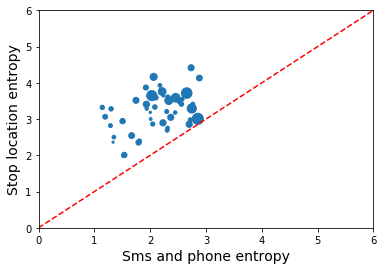

In [9]:
#Plotting the entropy vs entropy for each set
plt.figure()
max_unique = np.max(x_unique)
plt.scatter(x,y,size)
t= np.arange(0,7,0.5)
plt.axis([0,6,0,6])
plt.xlabel('Sms and phone entropy', fontsize=14)
plt.ylabel('Stop location entropy', fontsize=14)
plt.plot(t,t,'r--')

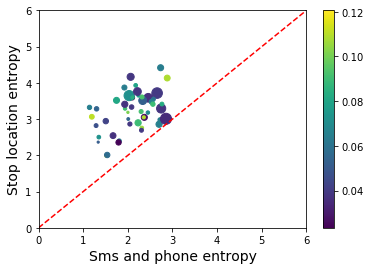

In [10]:
# Coloring the dots acording to amount of unique location / sequence length
plt.figure()
max_unique = np.max(x_unique)
plt.scatter(x,y,size,c=np.divide(x_unique,x_lengths))
t= np.arange(0,7,0.5)
plt.axis([0,6,0,6])
plt.xlabel('Sms and phone entropy', fontsize=14)
plt.ylabel('Stop location entropy', fontsize=14)
plt.colorbar()
plt.plot(t,t,'r--')


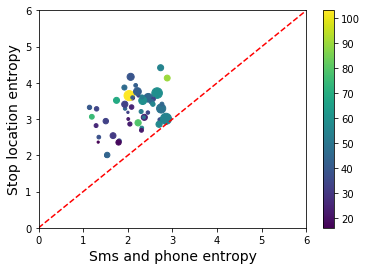

In [11]:
# Coloring the dots acording to amount of unique locations
plt.figure()
max_unique = np.max(x_unique)
plt.scatter(x,y,size,c=x_unique)
t= np.arange(0,7,0.5)
plt.axis([0,6,0,6])
plt.xlabel('Sms and phone entropy', fontsize=14)
plt.ylabel('Stop location entropy', fontsize=14)
plt.colorbar()
plt.plot(t,t,'r--')

# Predictability

In [12]:
x_prop = [func_Pred(x[i], x_unique[i]) for i in range(len(x))] 

In [13]:
y_prop = [func_Pred(y[i], y_unique[i]) for i in range(len(y))] 

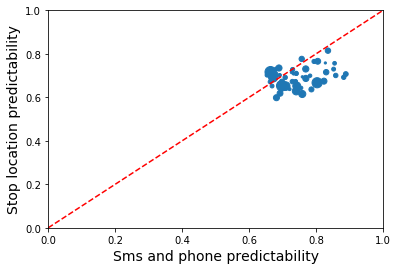

In [14]:
plt.scatter(x_prop,y_prop,size)
t= np.arange(0,7,0.5)
plt.axis([0,1,0,1])
plt.xlabel('Sms and phone predictability', fontsize=14)
plt.ylabel('Stop location predictability', fontsize=14)
plt.plot(t,t,'r--')

# Lenghts

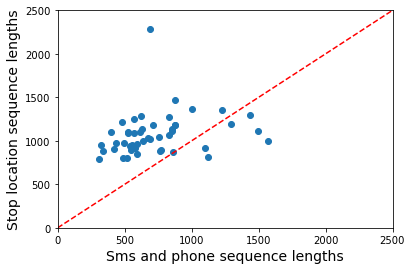

In [15]:
plt.scatter(x_lengths,y_lengths)
t= np.arange(0,4300,0.5)
plt.axis([0,2500,0,2500])
plt.xlabel('Sms and phone sequence lengths', fontsize=14)
plt.ylabel('Stop location sequence lengths', fontsize=14)
plt.plot(t,t,'r--')

# Unique states

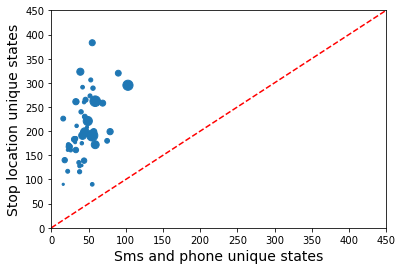

In [16]:
plt.scatter(x_unique,y_unique,size)
plt.axis([0,450,0,450])
plt.xlabel('Sms and phone unique states', fontsize=14)
plt.ylabel('Stop location unique states', fontsize=14)
plt.plot(t,t,'r--')